# Предсказание цены на подержанный автомобиль

####### Вопрос назначения цены становится актуальным, когда человек хочет продать свой автомобиль. Какую цену ставить в объявлении? Для этого нужно потратить существенное время, чтобы изучить похожие объявления на разных интернет-площадках.
Объявлений огромное количество, можно легко упустить что-то из виду, продешевить или наоборот, поставить завышенную цену 
и тем самым не привлечь потенциальных покупателей.
Мы исследуем рынок подержанных авто на примере автомобиля Kia Rio (я являюсь владельцем такого авто, и мне интересно предсказать его цену) и построим предиктивную модель.

##### Осуществим парсинг сайта auto.ru с объявлениями о продаже подержанных автомобилей Kia Rio

##### Код парсера https://github.com/FelixMusic/myprojects/blob/master/AutoRU_parser.py

In [1]:
# Импортируем необходимые для работы библиотеки и модули

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

### Обработаем данные с сайта auto.ru

In [2]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set.xls', index_col=None, header=None)

In [3]:
auto_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [4]:
# Назначим имена колонок в фрейме

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                        'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type', 
                        'region', 'price', 'link' ]

In [5]:
auto_data.head(3)

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,drive,wheel,condition,owners_count,passport,customs,complectation_type,region,price,link
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [6]:
# Посмотрим размер нашего дата-сета

auto_data.shape

(1221, 19)

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               1221 non-null   object
 1   year                1221 non-null   object
 2   km_age              1221 non-null   object
 3   body_type           1221 non-null   object
 4   color               1221 non-null   object
 5   engine_volume       1221 non-null   object
 6   engine_power        1221 non-null   object
 7   fuel_type           1221 non-null   object
 8   transmission        1221 non-null   object
 9   drive               1221 non-null   object
 10  wheel               1221 non-null   object
 11  condition           1221 non-null   object
 12  owners_count        1221 non-null   object
 13  passport            1221 non-null   object
 14  customs             1221 non-null   object
 15  complectation_type  1221 non-null   object
 16  region              1221

In [8]:
# Уберем предложения от дилеров (новые машины) и оставим только подержанные

auto_data = auto_data.loc[auto_data['year'] != 'None']

In [9]:
auto_data.shape

(1064, 19)

In [10]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [11]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 14
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio  III 4-speed
Kia Rio IV X-Line
Kia Rio  III 5-speed
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio  III 6-speed
Kia Rio II
Kia Rio  I Рестайлинг
Kia Rio I
Kia Rio  IV
Kia Rio  III Рестайлинг

   body_type: 3
седан
хэтчбек 5 дв.
универсал 5 дв.

   color: 14
белый
чёрный
серый
зелёный
бежевый
коричневый
серебристый
красный
оранжевый
голубой
синий
золотистый
жёлтый
фиолетовый

   engine_volume: 4
1.6 
1.4 
1.5 
1.3 

   engine_power: 11
123
107
100
97
98
95
112
75
105
84
108

   fuel_type: 2
 Бензин
 Бензин, газобаллонное оборудование

   transmission: 2
автоматическая
механическая

   drive: 1
передний

   wheel: 1
Левый

   condition: 1
Не требует ремонта

   owners_count: 3
1 владелец
3 или более
2 владельца

   passport: 2
Оригинал
Дубликат

   customs: 1
Растаможен

   complectation_type: 20
Комплектация
None
Комплектация Prestige AV
Комплектация Comfort Аудио
Комплектация Prestige
Комплектация Luxe
Комплектация 

In [12]:
# Столбец drive (тип привода) имеет лишь одно уникальное значение "передний", так что его тоже удалим

auto_data.drop(['drive'], axis='columns', inplace=True)

In [13]:
# Также удалим столбец wheel, т.к.расположение руля у всех автомобилей левое

auto_data.drop(['wheel'], axis='columns', inplace=True)

In [14]:
# Все автомобили растаможены, так что столбец 'customs' можно тоже удалить

auto_data.drop(['customs'], axis='columns', inplace=True)

In [15]:
# Все автомобили не требуют ремонта, удаляем столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [16]:
# Количество различных моделей

len(auto_data['model'].unique())

14

In [17]:
# Можно заметить, что некоторые модели повторяются, просто между названием Kia Rio и поколением разное количество пробелов:
# где-то один пробел, а где-то два

# заменим в названиях моделей два пробела подряд одним пробелом, например 'Kia Rio  III' сделаем 'Kia Rio III',
# чтобы уменьшить число категорий признака 'model'

auto_data['model'] = auto_data['model'].str.replace('  ',' ')

In [18]:
# Получилось 11 различных моделей

len(auto_data['model'].unique())

11

In [19]:
# Заменим модели 'Kia Rio III 4-speed', 'Kia Rio III 5-speed', 'Kia Rio III 6-speed' на модель 'Kia Rio III'
# т.к. в данных с других сайтов данная градация отсутствует (мы увидим это позже)

In [20]:
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 4-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 5-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 6-speed','Kia Rio III')

In [21]:
for i in auto_data['model'].unique():
    print(i)

Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio IV X-Line
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio II
Kia Rio I


In [22]:
# Посмотрим количество строк, где тип комплектации отсутствует(None) либо просто стоит одно слово 'Комплектация'

auto_data.loc[(auto_data['complectation_type'] == 'None') | (auto_data['complectation_type'] == 'Комплектация')].shape

(802, 14)

In [23]:
auto_data.shape

(1064, 14)

In [24]:
# Процент пропущенных данных

print((802 / 1064) * 100)

75.37593984962406


In [25]:
# В столбце 'complectation_type' отсутствует более 75% данных. Его тоже удаляем

auto_data.drop(['complectation_type'], axis='columns', inplace=True)

In [26]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,region,price
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,Москва,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,Тула,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,1 владелец,Оригинал,Калуга,695000
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,3 или более,Оригинал,Старая Купавна,350000
5,Kia Rio III,2013,115000,седан,серый,1.4,107,Бензин,механическая,2 владельца,Оригинал,Тверь,410000


In [27]:
# Посмотрим количество ПТС оригиналов и дубликатов

auto_data.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    992
Name: model, dtype: int64

In [28]:
# Влияное признака 'passport' будет рассмотрено ниже

In [29]:
# В данных представлены три различных типа кузовов, их влияние на цену рассмотри ниже

In [30]:
# позиции, где не указана цена

auto_data.loc[auto_data['price'] == 'None']

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,region,price
965,Kia Rio III Рестайлинг,2016,89000,хэтчбек 5 дв.,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,None,None


In [31]:
# оставим только те данные, где указана цена, т.к. цена является целевым признаком
# Если цена отсутствует - автомобиль уже продан

auto_data = auto_data.loc[auto_data['price'] != 'None']

In [32]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')
auto_data['engine_volume'] = auto_data['engine_volume'].astype('float')

In [33]:
# Удалим дубликаты строк

In [34]:
auto_data = auto_data.drop_duplicates()

In [35]:
auto_data.shape

(994, 13)

In [36]:
# Уникальные значения регионов

auto_data['region'].unique()

array(['Москва', 'Тула', 'Калуга', 'Старая Купавна', 'Тверь', 'Балашиха',
       'Обнинск', 'Рязань', 'Химки', 'Реутов', 'Подольск', 'Коломна',
       'Ярославль', 'Королёв', 'Электросталь', 'Голицыно', 'Иваново',
       'Зеленоград', 'Красногорск', 'Чехов', 'Павловский Посад',
       'Серпухов', 'Собинка', 'Мытищи', 'Карабаново', 'Жуковский',
       'Люберцы', 'Щелково', 'Нахабино', 'Кохма', 'Владимир', 'Клин',
       'Сергиев Посад', 'Белоусово', 'Орехово-Зуево', 'Конаково',
       'Ступино', 'Московский', 'Бронницы', 'Медынь', 'Лосино-Петровский',
       'Малоярославец', 'Ивантеевка', 'Горки', 'Железнодорожный',
       'Воскресенск', 'Ногинск', 'Киржач', 'Дубна', 'Александров',
       'Домодедово', 'Истра', 'Козельск', 'Переславль-Залесский',
       'Лыткарино', 'Малаховка', 'Протвино', 'Егорьевск', 'Куровское',
       'Раменское', 'Кольчугино', 'Удельная', 'Лихославль', 'Камешково',
       'Новый Городок', 'Кабицыно', 'Ковров', 'Ликино-Дулево', 'Пушкино',
       'Дмитров', 'Новопет

In [38]:
len(auto_data['region'].unique())

109

In [40]:
# В столбце 'region' много городов Московской области. Заменим их значения на 'МО'
# Создадим список всех городов Московской области:

mo_cityes = ['Апрелевка','Балашиха', 'Бронницы','Верея','Видное','Волоколамск','Воскресенск','Голицыно','Дзержинский',
      'Дмитров','Долгопрудный','Домодедово','Дрезна','Дубна','Егорьевск','Жуковский','Зарайск','Звенигород',
      'Ивантеевка','Истра','Кашира','Климовск','Клин','Коломна','Королёв','Котельники','Красмоармейск','Красногорск',
      'Краснозаводск','Краснознаменск','Кубинка','Куровское','Ликино-Дулево','Лобня','Лосино-Петровский','Луховицы',
      'Лыткарино','Люберцы','Можайск','Мытищи','Наро-Фоминск','Ногинск','Одинцово','Озеры','Орехово-Зуево',
      'Павловский Посад','Пересвет','Подольск','Протвино','Пушкино','Пущино','Раменское','Реутов','Рошаль','Руза',
      'Сергиев Посад','Серпухов','Солнечногорск','Старая Купавна','Ступино','Талдом','Фрязино','Химки',
      'Хотьково','Черноголовка','Чехов','Шатура','Щелково','Электрогорск','Электросталь','Электроугли',
      'Юбилейный','Яхрома']

In [41]:
# заменим требуемые значения

for i in auto_data['region'].unique():
    if i in mo_cityes:
        auto_data['region'] = auto_data['region'].str.replace(i,'МО')

In [42]:
len(auto_data['region'].unique())

60

In [43]:
# список сократился на 49 значений

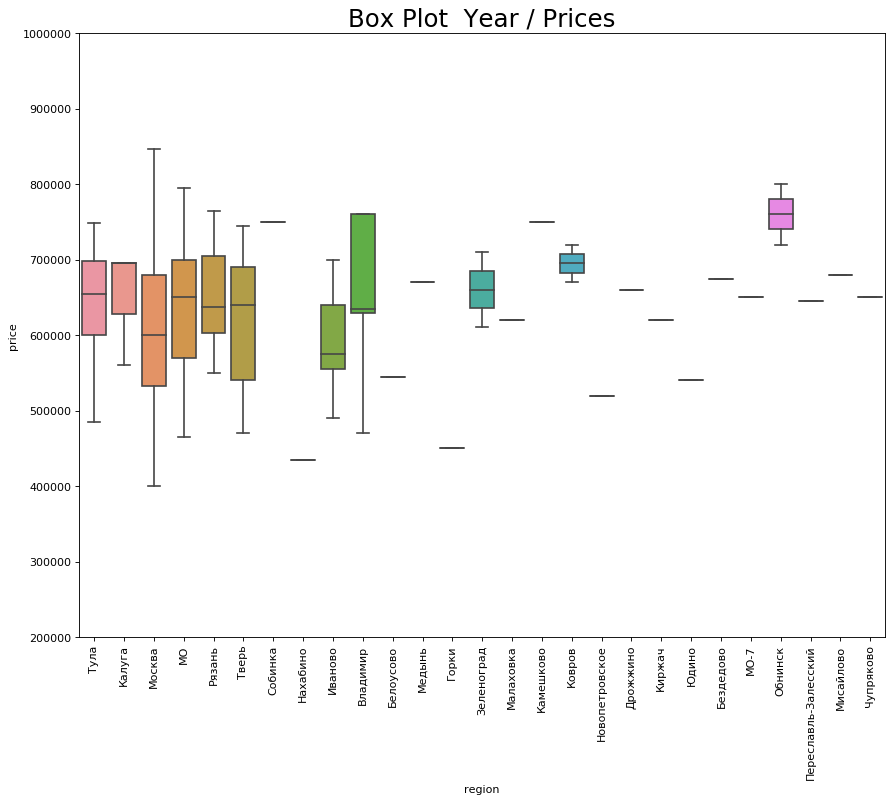

In [44]:
# Построим Box Plot цены по регионам для модели 'Kia Rio III Рестайлинг'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(200000, 1000000)
plt.show()

#### Цены на Kia Rio III Рестайлинг входят в межквартильный размах цен Москвы (Box Plot с самым большим размахом),
#### можно сделать вывод, что цены по стране примерно одинаковые

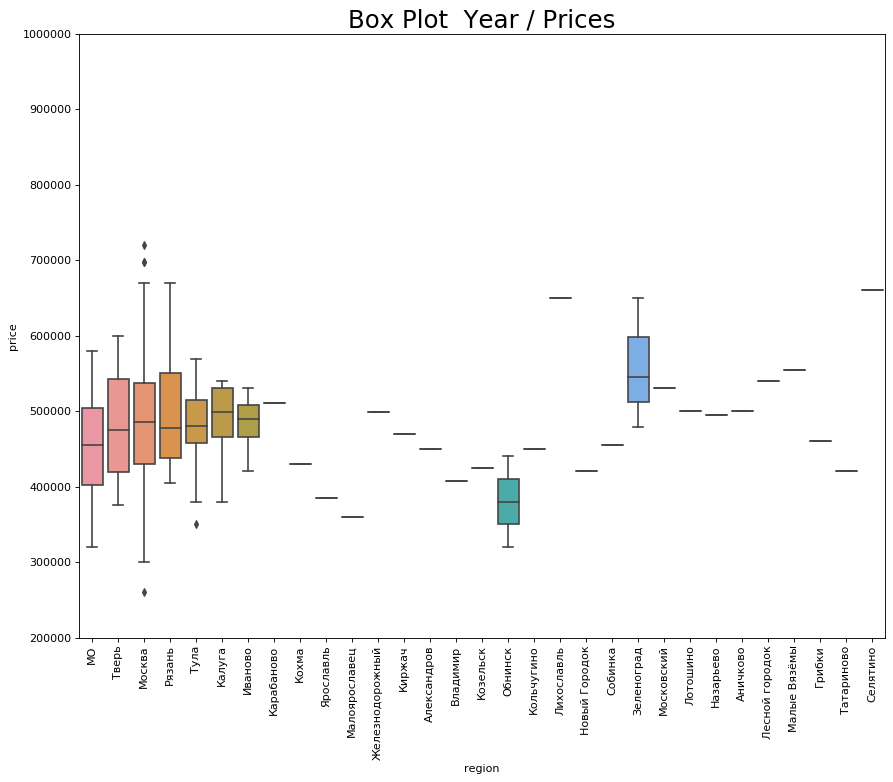

In [46]:
# Построим Box Plot цены по регионам для модели 'Kia Rio III'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio III'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(200000, 1000000)
plt.show()

#### Для Kia Rio III картина похожая

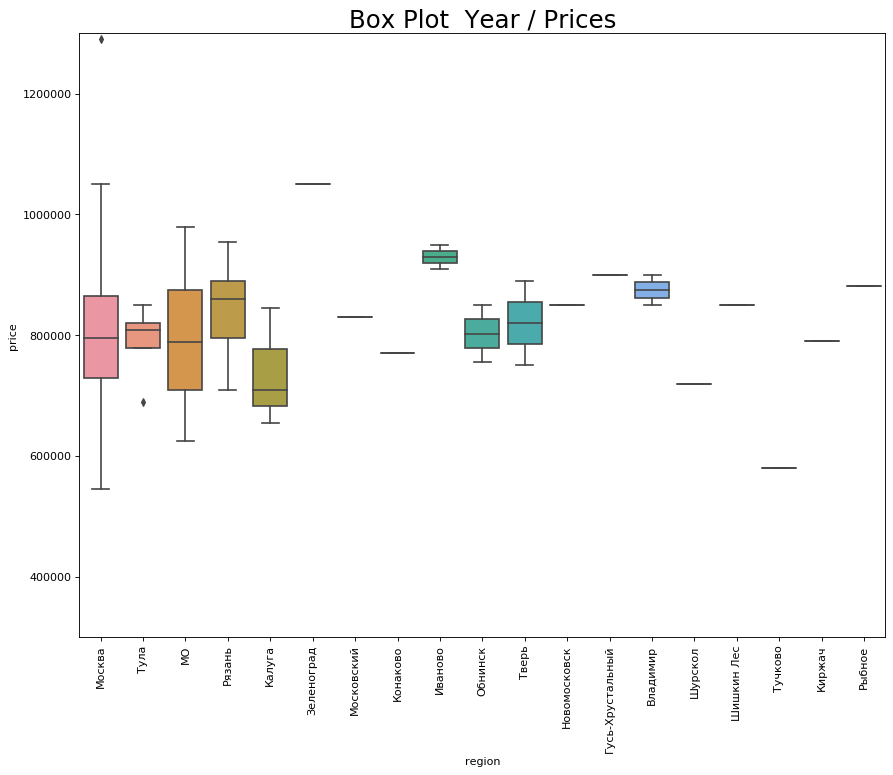

In [49]:
# Построим Box Plot цены по регионам для модели 'Kia Rio IV'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio IV'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio IV'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(300000, 1300000)
plt.show()

#### Для Kia Rio IV картина похожая

In [51]:
# Удалим столбец 'region'

auto_data.drop(['region'], axis='columns', inplace=True)

## Распределение целевого признака (цены)


 mu = 578168.89 and sigma = 207001.98



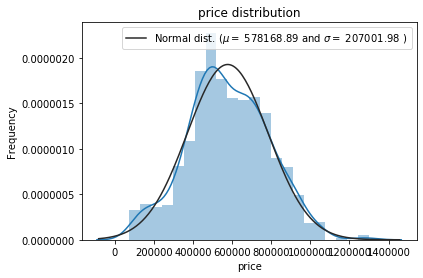

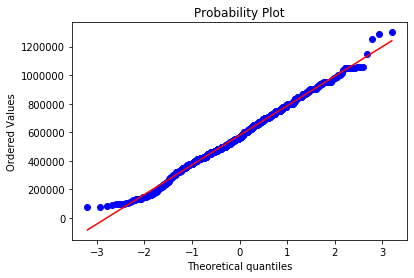

In [52]:
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [53]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.071111
Kurtosis: -0.083184


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [54]:
# Заменим значение 'газобаллонное оборудование' на 'ГБО'

auto_data['fuel_type'] = auto_data['fuel_type'].str.replace('газобаллонное оборудование','ГБО')

In [55]:
for i in auto_data['fuel_type'].unique():
    print(i)

 Бензин
 Бензин, ГБО


In [56]:
# Сгруппируем данные по модельному ряду и посмотрим среднюю цену

auto_data.groupby('model')['price'].mean()

model
Kia Rio I                 118928.428571
Kia Rio I Рестайлинг      168567.567568
Kia Rio II                278719.192308
Kia Rio II Рестайлинг     355235.135135
Kia Rio III               480540.362007
Kia Rio III Рестайлинг    611198.620130
Kia Rio IV                798281.362745
Kia Rio IV X-Line         924893.153846
Name: price, dtype: float64

In [57]:
# Построим Box Plot цены по годам выпуска. Для удобства создадим фрейм данных с именем df

df = auto_data

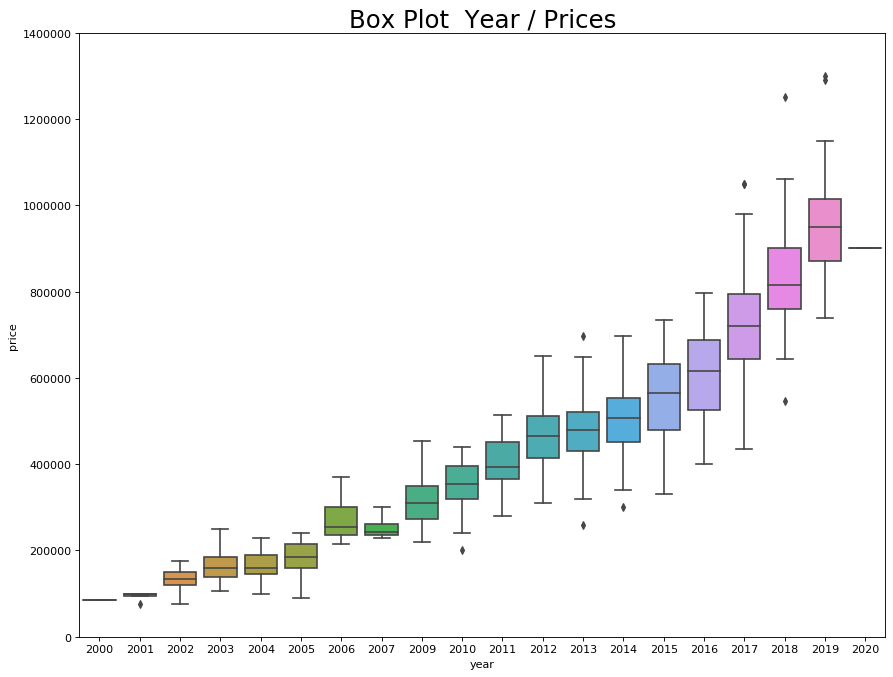

In [58]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

####### На графике присутствуют "выбросы" по цене. У дилера есть определенная линейка комплектаций, она укладывается в статистику. Если цена заметно выше, то велика вероятность, что владелец установил за дополнительную плату какое-нибудь дорогое дополнительное оборудование (диски/мультимедиа/камеры и т.п.). Такие "выбросы" лучше исключить. Если же цена очень низкая - скорее всего авто в не очень хорошем состоянии.
Пока не будем удалять выбросы, построим модель и посмотрим, какие будут результаты сначала с выбросами, а потом без них

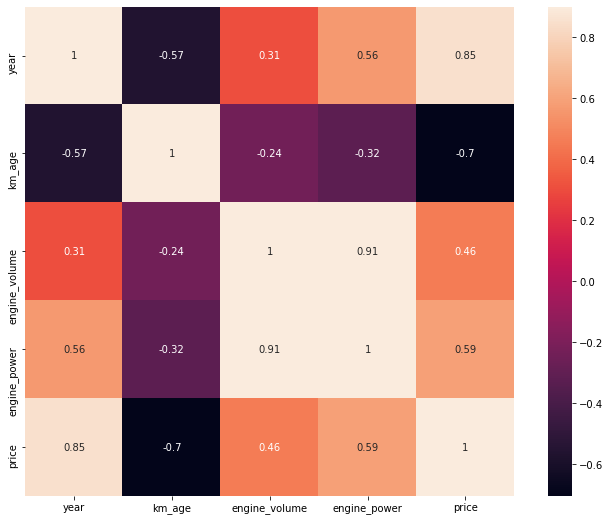

In [59]:
# посмотрим на матрицу корреляций

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

####### На матрице корреляций можно увидеть, что признаки 'engine_volume' и 'engine_power' сильно коррелируют между собой.
Действительно, между ними прямая взаимосвязь, чем больше объем двигателя, тем больше мощность.
Удалим 'engine_volume', т.к. при одинаковых объемах двигателя может быть различная мощность у разных поколений автомобилей

In [60]:
df.drop(['engine_volume'], axis='columns', inplace=True)

In [61]:
df.head()

,model,year,km_age,body_type,color,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,107,Бензин,механическая,2 владельца,Оригинал,410000


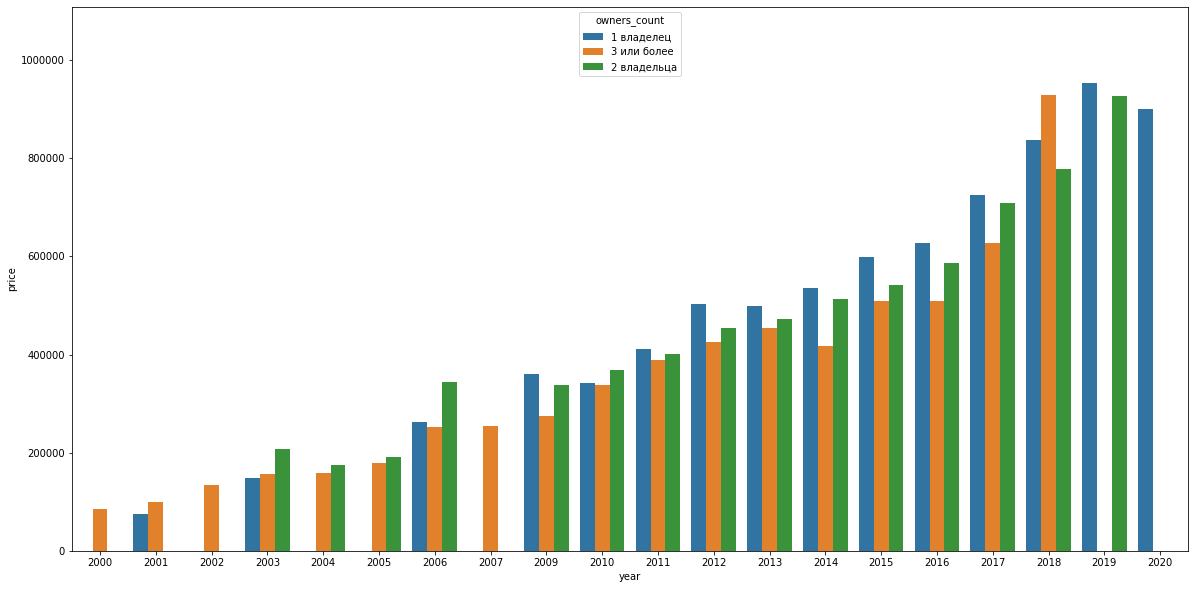

In [62]:
# Посмотрим на столбчатую диаграмму средней цены по годам в зависимости от количества владельцев

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='owners_count', errwidth=0, data=df)

####### В большинстве годов автомобили с одним владельцем стоят дороже, дешевле с двумя и еще дешевле с 3 и более. Это не очень старые автомобили, на которые есть хороший спрос.

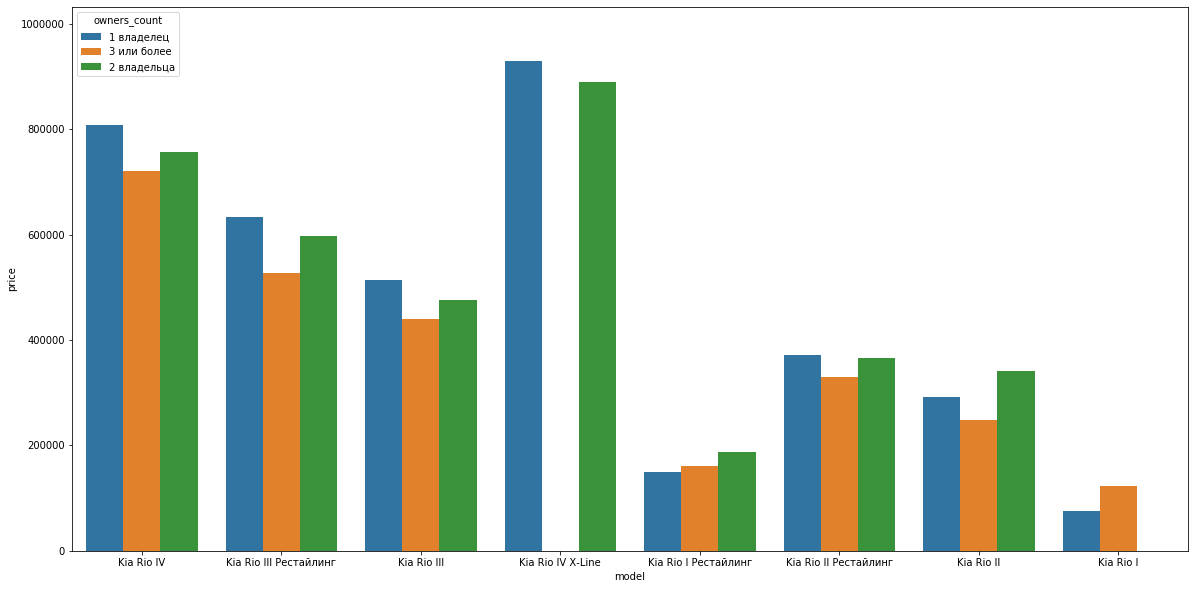

In [63]:
# Построим диаграмму цен в зависимости от количества владельцев по моделям

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='model', y='price', hue='owners_count', errwidth=0, data=df)

####### Такая же картина начиная со 2 поколения с рестайлингом.

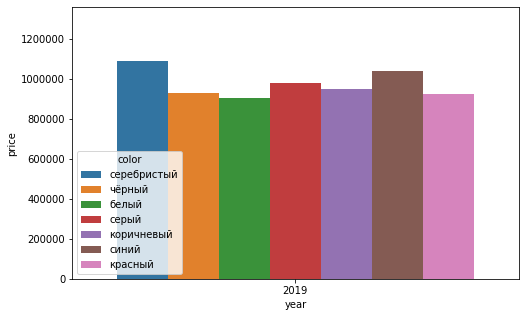

In [64]:
# Цена, в зависимости от цвета для 2019 года

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

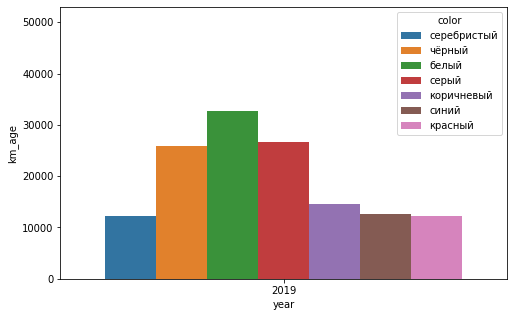

In [65]:
# Пробег овтомобилей различных цветов в 2019 году

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

####### На двух последних столбчатых диаграммах мы показали автомобили 2019 года с разбивкой цены по цветам и пробега по цветам. Как видно из этих диаграмм, цвет не влияет на цену (или влияет очень несущественно при прочих равных условиях), например серебристые автомобили 2019 года имеют самую высокую среднюю цену, но при этом у них самый маленький средний пробег.
Белые автомобили (3-й столбец), напротив, имеют самую низкую цену, но самый высокий пробег, хотя белый цвет довольно популярный.

#### Проверим картину для 2018 года

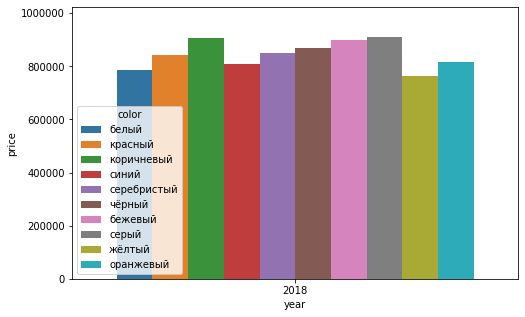

In [66]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

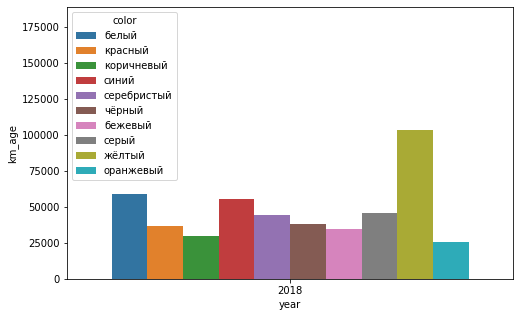

In [67]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

###### Картина примерно такая же

In [68]:
# удалим столбец с цветом

df.drop(['color'], axis='columns', inplace=True)

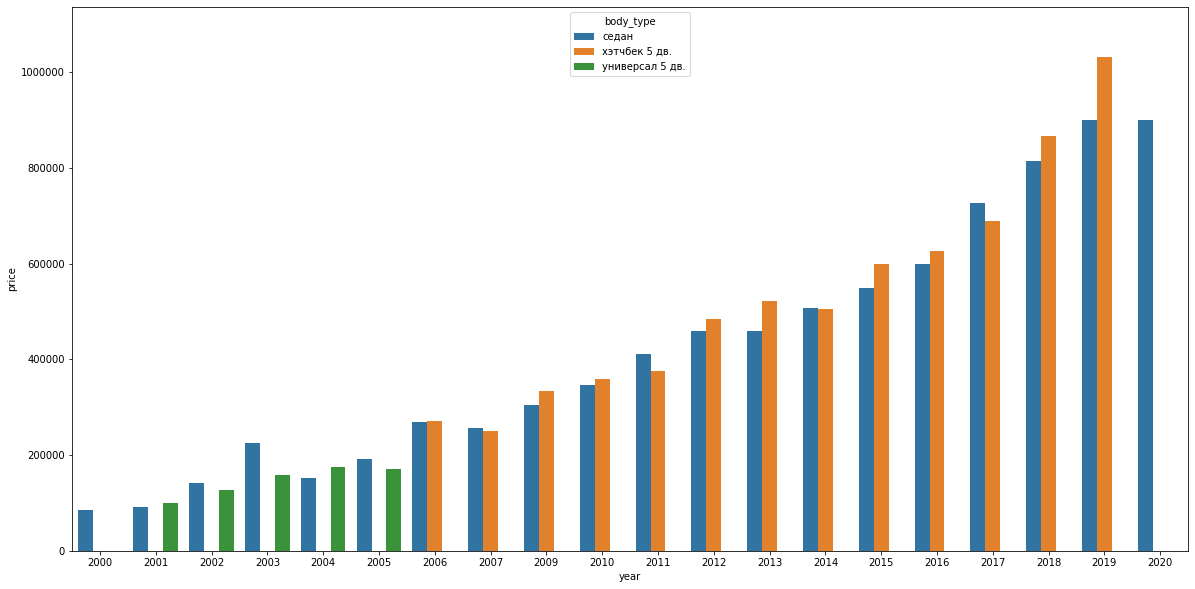

In [69]:
# Посмотрим на диаграммы цен по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='body_type', errwidth=0, data=df)

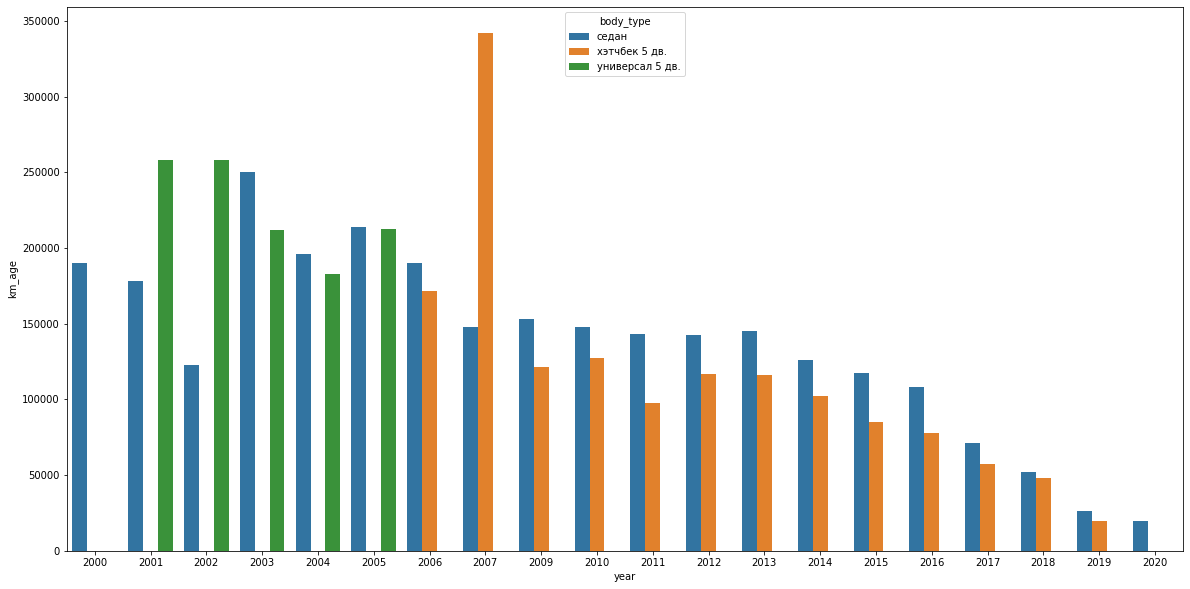

In [70]:
# Посмотрим на диаграммы пробегов по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='body_type', errwidth=0, data=df)

####### В большинстве годов выпуска хэтчбеки стоили немного дороже седанов. Но у хэтчбеков был ниже пробег по годам.
Новые хэтчбеки в автосалонах стоят немного дороже седанов, поэтому оставим этот признак.

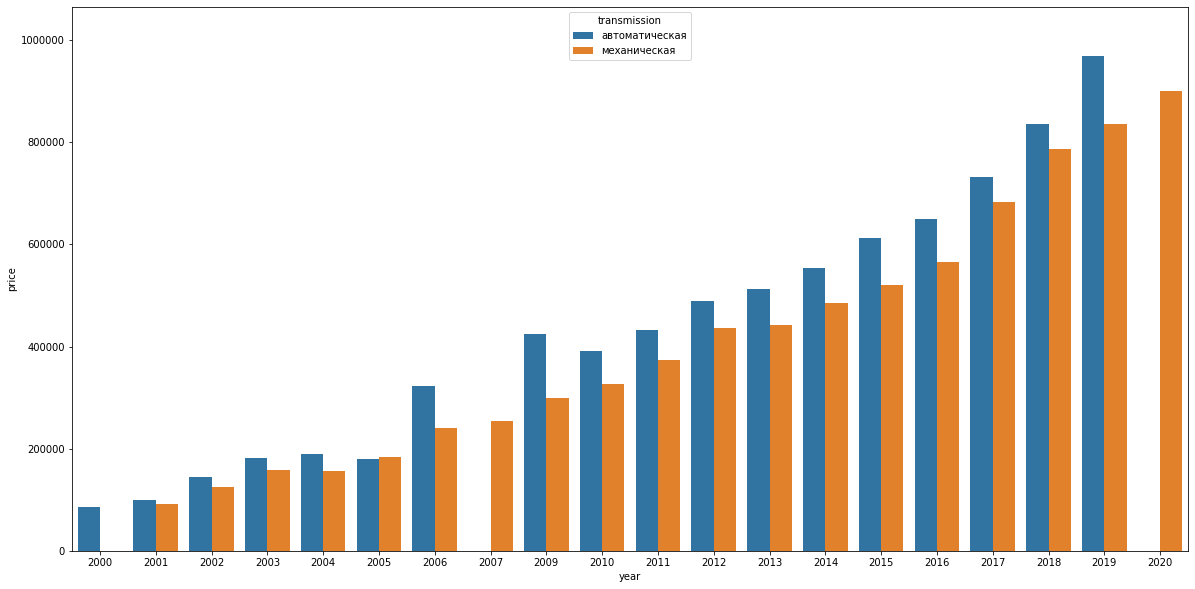

In [71]:
# Диаграмма цен по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='transmission', errwidth=0, data=df)

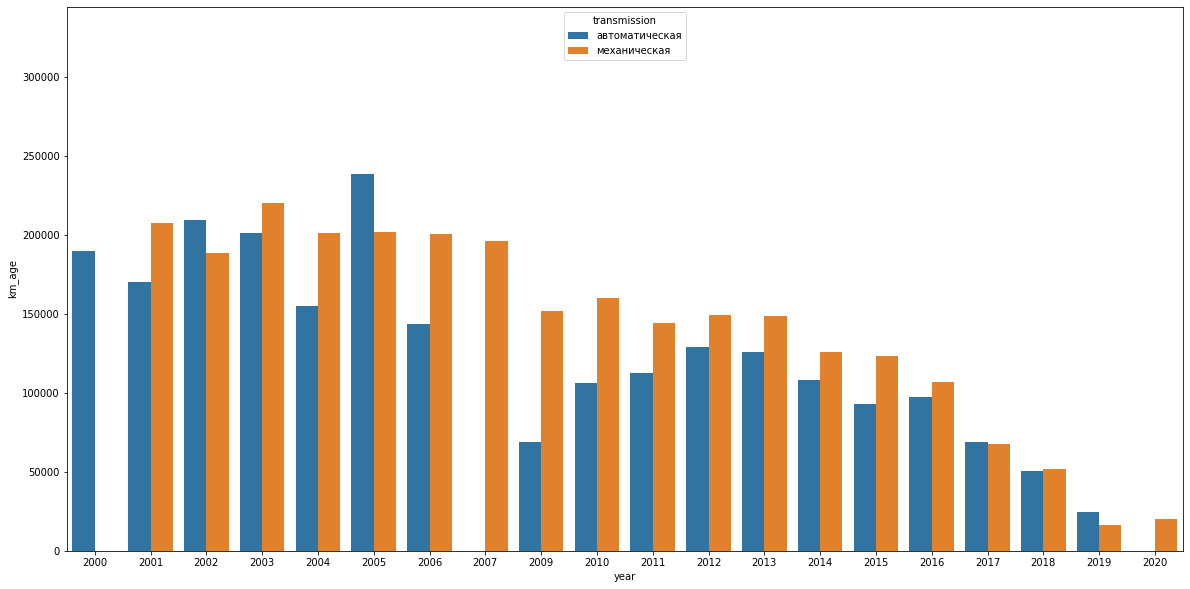

In [72]:
# Диаграмма пробегов по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='transmission', errwidth=0, data=df)

####### Автомобили с автоматической трансмиссией стоят дороже, но средний пробег по годам больше на "механике". Новые автомобили на автомате стоят дороже, примем допущение, что и на подержанные распространяется такое явление.

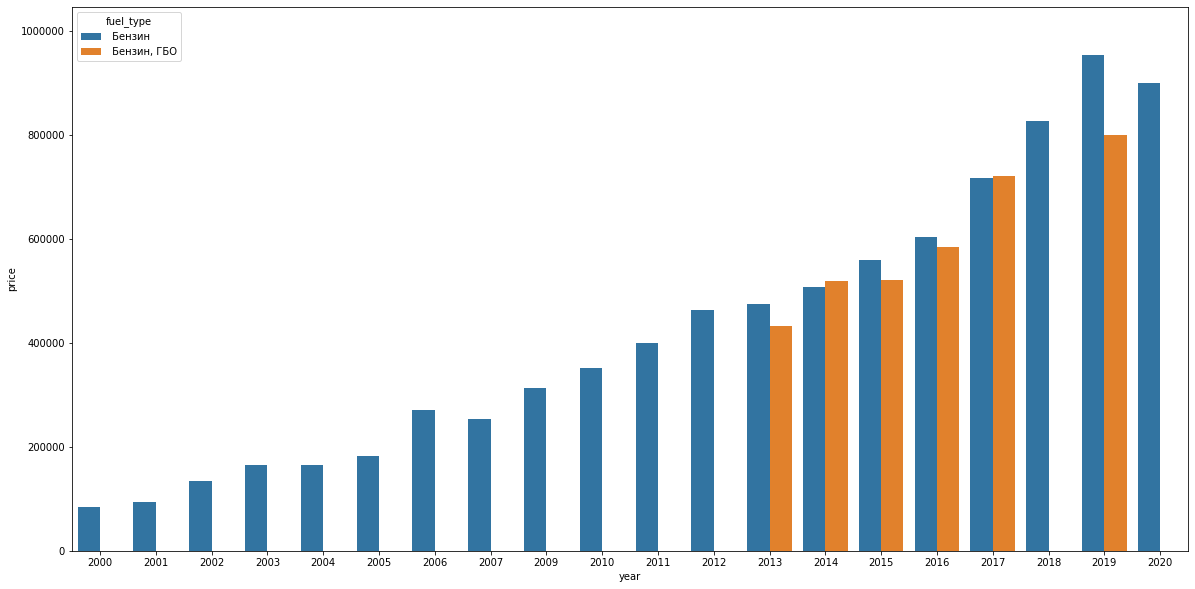

In [73]:
# Диаграмма цен по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='fuel_type', errwidth=0, data=df)

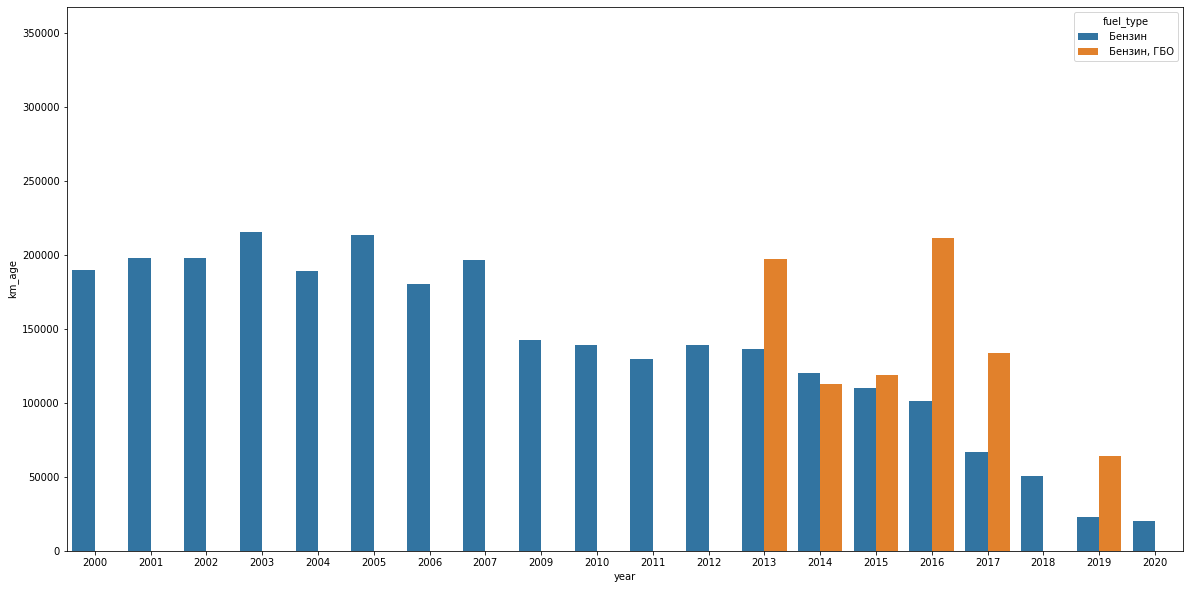

In [74]:
# Диаграмма пробегов по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='fuel_type', errwidth=0, data=df)

In [75]:
# Посмотрим количество автомобилей в группах с различными типами топлива

df.groupby('fuel_type').count()['model']

fuel_type
 Бензин         980
 Бензин, ГБО     14
Name: model, dtype: int64

####### Автомобилей, оснащенных ГБО, всего 14 в нашей выборке, 1.3%, это несущественно, тем более из двух последних графиков видно, что цена автомобилей с ГБО зависит от пробега.

In [76]:
# удалим этот столбец

df.drop(['fuel_type'], axis='columns', inplace=True)

In [77]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [78]:
df.groupby('passport').count()['model']

passport
Дубликат     66
Оригинал    928
Name: model, dtype: int64

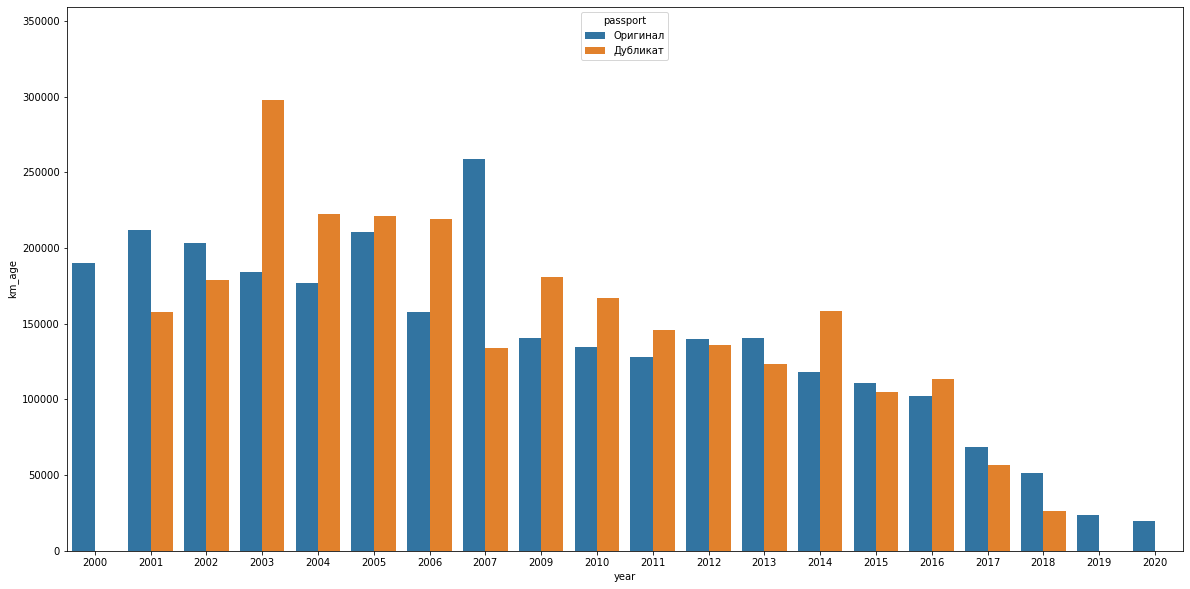

In [79]:
# Диаграмма пробегов с различными видами ПТС по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='passport', errwidth=0, data=df)

####### Дубликат ПТС выдается, когда закончилось место в оригинале, либо при утере/порче. Место может закончиться, если много владельцев. В принципе, ничего криминального в дубликате ПТС нет. Тем более, нами было выяснено, что наличие этого признака ухудшает модель (возрастает RMSE).

In [80]:
# Удалим колонку 'passport'

df.drop(['passport'], axis='columns', inplace=True)

In [81]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [82]:
# Итоговые признаки для дальнейшей работы

print(df.columns.tolist())

['model', 'year', 'km_age', 'body_type', 'engine_power', 'transmission', 'owners_count', 'price']


In [83]:
# создадим фрейм под именем auto_ru_set

auto_ru_set = df

## Обработаем данные с сайта drom.ru

#### Код парсера https://github.com/FelixMusic/myprojects/blob/master/DromRU_parser.py
##### Будем извлекать только те данные, которые были оставлены выше

In [84]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

In [85]:
# Назначим имена колонок

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'price', 'link']

In [86]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [87]:
auto_data.shape

(2000, 8)

In [88]:
auto_data.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,"2 поколение, рестайлинг",2011,125589,седан,95,автомат,1 запись,364000
1,3 поколение,2012,149829,хэтчбек 5 дв.,107,механика,3 записи,375000
2,3 поколение,2014,114900,седан,123,автомат,None,627000
3,"3 поколение, рестайлинг",2016,70000,хэтчбек 5 дв.,107,автомат,2 записи,597000
4,4 поколение,2020,Пробег не указан,седан,123,автомат,None,939900


In [89]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [90]:
# Оставим только те строки, где указан пробег

auto_data = auto_data.loc[auto_data['km_age'] != 'Пробег не указан']

In [91]:
auto_data.shape

(1236, 8)

In [92]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'engine_power', 'transmission','owners_count']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 7
2 поколение, рестайлинг
3 поколение
3 поколение, рестайлинг
4 поколение
1 поколение, рестайлинг
2 поколение
1 поколение

   body_type: 3
седан
хэтчбек 5 дв.
универсал

   engine_power: 7
95
107
123
97
100
96
84

   transmission: 2
автомат
механика

   owners_count: 11
1 запись
3 записи
2 записи
5 записей
4 записи
6 записей
8 записей
7 записей
9 записей
11 записей
10 записей



In [93]:
# Заменим названия модификаций, чтобы они были как в датафрейме с auto.ru

auto_data['model'] = auto_data['model'].str.replace("1 поколение",'Kia Rio I')
auto_data['model'] = auto_data['model'].str.replace("1 поколение, рестайлинг",'Kia Rio I Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("2 поколение",'Kia Rio II')
auto_data['model'] = auto_data['model'].str.replace("2 поколение, рестайлинг",'Kia Rio II Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("3 поколение",'Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace("3 поколение, рестайлинг",'Kia Rio III Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("4 поколение",'Kia Rio IV')

In [94]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II, рестайлинг
Kia Rio III
Kia Rio III, рестайлинг
Kia Rio IV
Kia Rio I, рестайлинг
Kia Rio II
Kia Rio I


In [95]:
# появилась лишняя запятая в названиях, возможно какой-то баг, удалим ее
# Также пропишем слово 'рестайлинг' с заглавной буквы

auto_data['model'] = auto_data['model'].str.replace(",",'')

auto_data['model'] = auto_data['model'].str.replace("рестайлинг",'Рестайлинг')

In [96]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio III
Kia Rio III Рестайлинг
Kia Rio IV
Kia Rio I Рестайлинг
Kia Rio II
Kia Rio I


In [97]:
# Заменим значения типов трансмиссии, как в данных с auto.ru

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [98]:
# Заменим значения типа кузова, как в данных с auto.ru

auto_data['body_type'] = auto_data['body_type'].str.replace('универсал','универсал 5 дв.')

In [99]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [100]:
# В дата-сете отсутствуют модели X-Line

auto_data.loc[(auto_data['model'] == 'Kia Rio IV') & (auto_data['body_type'] == 'хэтчбек 5 дв.')]

,model,year,km_age,body_type,engine_power,transmission,owners_count,price


In [101]:
# Поменяем записи по количеству владельцев

auto_data['owners_count'] = auto_data['owners_count'].str.replace('1 запись','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2 записи','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('5 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('6 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('7 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('8 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('9 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('10 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('11 записей','3 или более')

In [102]:
# проверим

auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [103]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [104]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

### Распределение целевого признака (цены)


 mu = 579330.09 and sigma = 182006.35



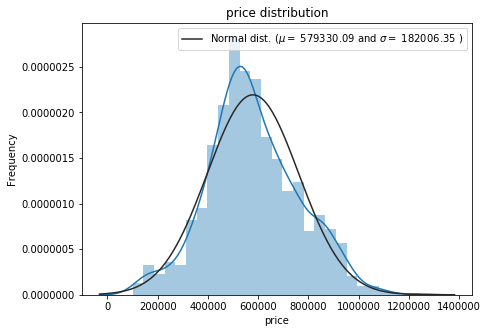

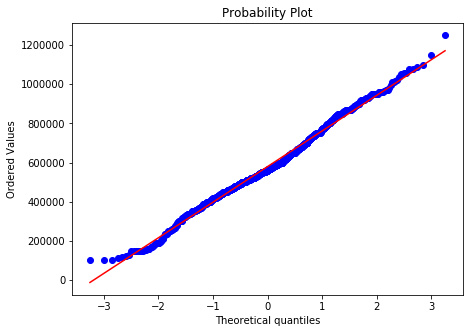

In [105]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [106]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.191390
Kurtosis: 0.096398


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [107]:
# Для удобства создадим фрейм данных с именем df

df = auto_data

In [108]:
df.shape

(1233, 8)

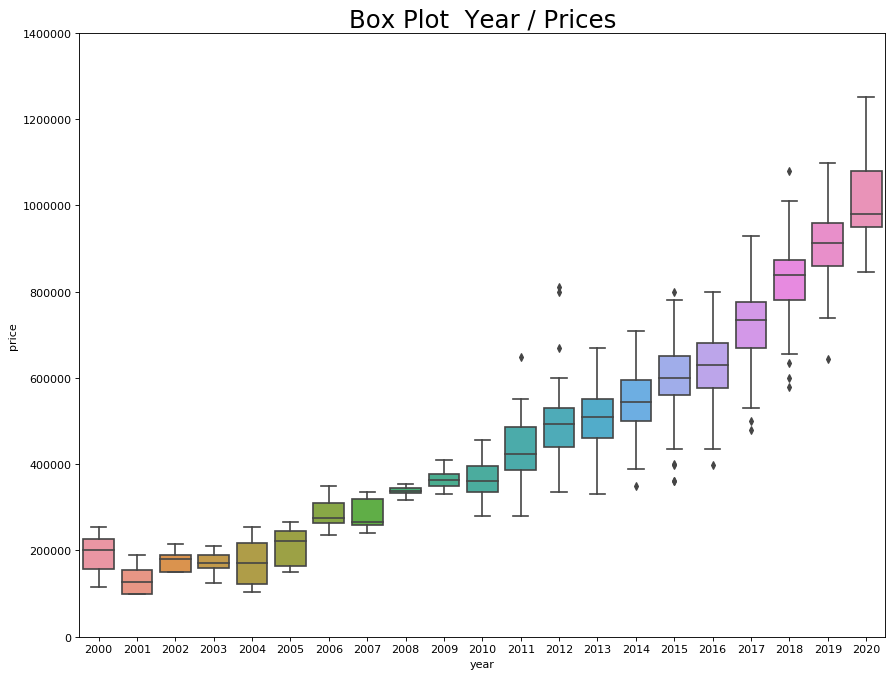

In [109]:
# Построим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

##### Как и в первом случае, выбросы пока удалять не будем

In [110]:
# создадим фрейм под именем drom_ru_set

drom_ru_set = df

## Обработаем данные с сайта с avito.ru

#### Код парсера https://github.com/FelixMusic/myprojects/blob/master/Avito_AUTO_parser.py

In [111]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

In [112]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'condition', 'price', 'link' ]

In [113]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [114]:
auto_data.shape

(4707, 9)

In [115]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [116]:
auto_data.shape

(4328, 9)

In [117]:
# Посмотрим уникальные значения некоторых столбцов

for i in [ 'model', 'body_type', 'engine_power', 'transmission','owners_count', 'condition']:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 8
II рестайлинг
II
III
IV
III рестайлинг
I рестайлинг
I
IV рестайлинг

   body_type: 2
седан
хетчбэк

   engine_power: 13
97
123
107
100
95
98
108
75
105
84
109
112
82

   transmission: 2
автомат
механика

   owners_count: 4
3
2
4+
1

   condition: 2
не битый
битый



In [118]:
# Заменим значение типа трансмиссии

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [119]:
# В данных присутствуют "битые" автомобили

auto_data.groupby('condition').count()['model']

condition
битый        108
не битый    4220
Name: model, dtype: int64

In [120]:
# итого 108 битых автомобилей. Исключим их

auto_data = auto_data.loc[auto_data['condition'] != 'битый']

In [121]:
# Теперь можно удалить столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [122]:
# Переименум названия моделей

auto_data['model'] = 'Kia Rio ' + auto_data['model']

In [123]:
auto_data['model'] = auto_data['model'].str.replace('рестайлинг','Рестайлинг')

In [124]:
for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio II
Kia Rio III
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio I Рестайлинг
Kia Rio I
Kia Rio IV Рестайлинг


In [125]:
# Переименуем значения в столбце 'owners_count'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('3','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('1','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4+','3 или более')

In [126]:
for i in auto_data['owners_count'].unique():
    print(i)

3 или более
2 владельца
3 или более+
1 владелец


In [127]:
# В значении '3 или более+' уберем '+'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('+','')

In [128]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '1 владелец'], dtype=object)

In [129]:
# Переименуем 'хетчбэк' на 'хэтчбек 5 дв.'

auto_data['body_type'] = auto_data['body_type'].str.replace('хетчбэк','хэтчбек 5 дв.')

In [130]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.'], dtype=object)

In [131]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [132]:
auto_data.shape

(4220, 8)

In [133]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

In [134]:
# удалим новые автомобили (с очень маленьким пробегом) - предложения от дилеров

auto_data = auto_data.loc[auto_data['km_age'] > 150]

In [135]:
auto_data.shape

(4024, 8)

### Распределение целевого признака (цены)


 mu = 568955.81 and sigma = 196367.20



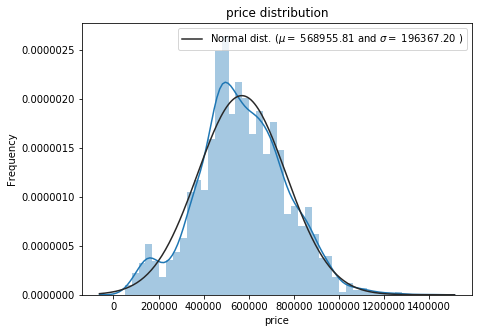

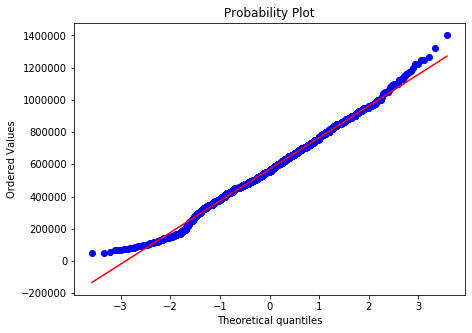

In [136]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [137]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.073959
Kurtosis: 0.162472


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [138]:
# Также создадим фрейм df для удобства

df = auto_data

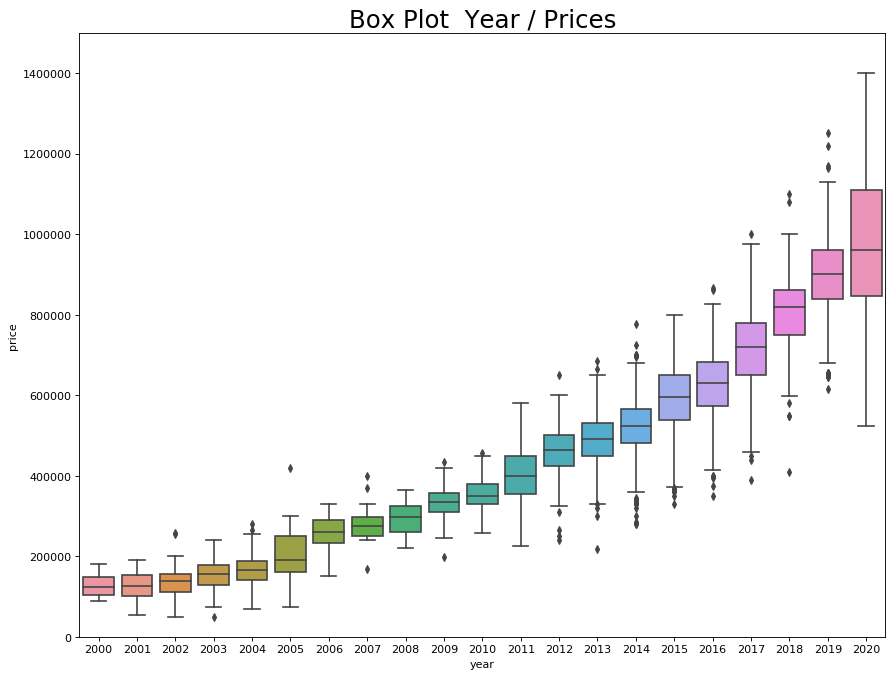

In [139]:
# Постоим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

#### Выбросы пока не удаляем

In [140]:
# создадим фрейм под именем avito_ru_set

avito_ru_set = df

### Итого, мы имеем три набора данных с разных сайтов

In [141]:
auto_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [142]:
drom_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2011,125589,седан,95,автоматическая,1 владелец,364000
1,Kia Rio III,2012,149829,хэтчбек 5 дв.,107,механическая,3 или более,375000
3,Kia Rio III Рестайлинг,2016,70000,хэтчбек 5 дв.,107,автоматическая,2 владельца,597000
8,Kia Rio III Рестайлинг,2016,101000,седан,107,автоматическая,1 владелец,640000
10,Kia Rio IV,2017,63000,седан,123,механическая,1 владелец,759000


In [143]:
avito_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2009,169700,седан,97,автоматическая,3 или более,340000
1,Kia Rio II,2007,290000,седан,97,автоматическая,2 владельца,290000
2,Kia Rio III,2011,132000,седан,123,автоматическая,3 или более,485000
3,Kia Rio III,2012,93000,хэтчбек 5 дв.,123,механическая,1 владелец,450000
4,Kia Rio III,2012,150000,седан,107,механическая,3 или более,429000


### Объединим все три набора в один

In [144]:
new_df = pd.concat([auto_ru_set, drom_ru_set, avito_ru_set], ignore_index=True)

In [145]:
new_df.shape

(6251, 8)

In [146]:
# удалим дубликаты, на разных сайтах объявления могут совпадать

new_df = new_df.drop_duplicates()

In [147]:
new_df.shape

(6012, 8)

#### Итак, мы получили один итоговый набор данных, соединив три фрейма с разных площадок

In [148]:
df = new_df


 mu = 568955.81 and sigma = 196367.20



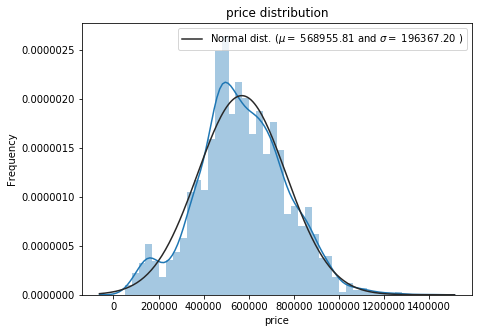

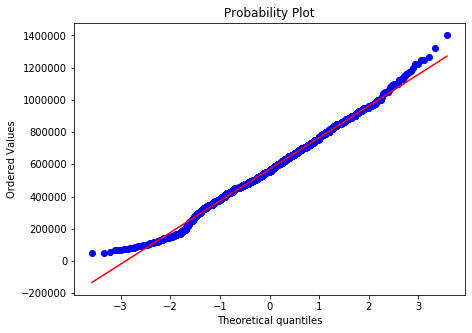

In [149]:
# Посмотрим, как распределена цена

plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

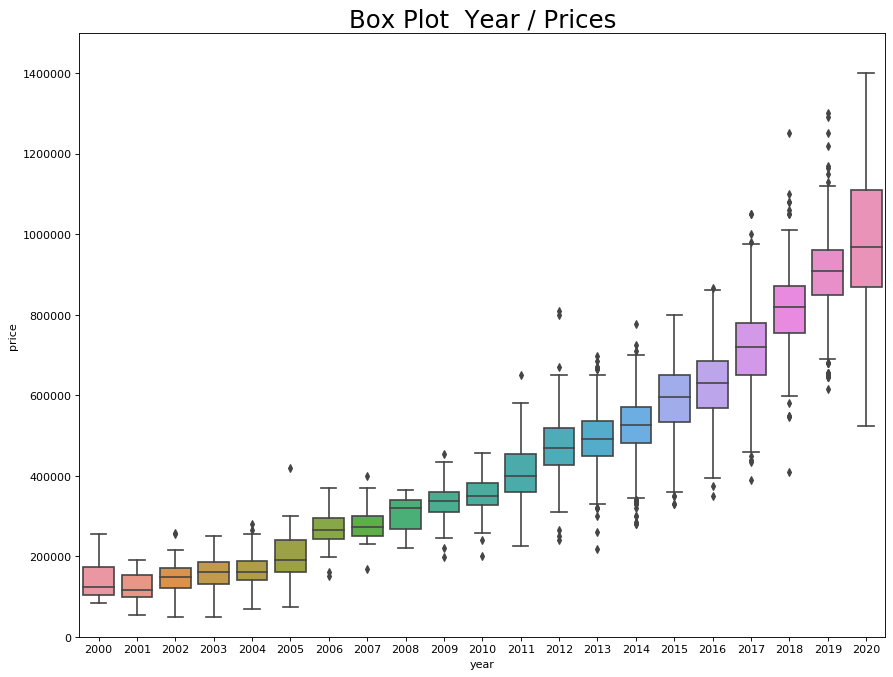

In [150]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

# Алгоритм CatBoost

#### Назначаем X и y

In [151]:
X = df.drop(['price'], axis=1)
y = df['price']

#### Подберем гиперпараметры регрессора, используя кроссвалидацию
#### Разобъем данные на тренировочные и тестовые, test_size=0.25

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.02, 0.03, 0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1, 1.3]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 192543.7032428	total: 49.4ms	remaining: 39.4s
1:	learn: 188419.2138160	total: 54.2ms	remaining: 21.6s
2:	learn: 184155.1607222	total: 60ms	remaining: 15.9s
3:	learn: 179965.4135849	total: 64.1ms	remaining: 12.8s
4:	learn: 176072.2797809	total: 67.7ms	remaining: 10.8s
5:	learn: 172218.7206600	total: 71.1ms	remaining: 9.41s
6:	learn: 168508.5959635	total: 75.8ms	remaining: 8.59s
7:	learn: 164890.2720884	total: 79.5ms	remaining: 7.87s
8:	learn: 161425.1685715	total: 85.7ms	remaining: 7.53s
9:	learn: 158005.6172397	total: 88.3ms	remaining: 6.98s
10:	learn: 154636.8455616	total: 91ms	remaining: 6.53s
11:	learn: 151503.0765008	total: 94.3ms	remaining: 6.19s
12:	learn: 148392.7741976	total: 96.9ms	remaining: 5.87s
13:	learn: 145403.7116308	total: 123ms	remaining: 6.9s
14:	learn: 142592.5799636	total: 193ms	remaining: 10.1s
15:	learn: 139882.2098477	total: 197ms	remaining: 9.66s
16:	learn: 137096.3579726	total: 201ms	remaining: 9.28s
17:	learn: 134362.4565461	total: 205ms	remaining: 

167:	learn: 56454.3255465	total: 937ms	remaining: 3.52s
168:	learn: 56429.5536637	total: 941ms	remaining: 3.51s
169:	learn: 56418.6487641	total: 943ms	remaining: 3.5s
170:	learn: 56398.5717701	total: 946ms	remaining: 3.48s
171:	learn: 56365.4517975	total: 949ms	remaining: 3.47s
172:	learn: 56328.0937987	total: 952ms	remaining: 3.45s
173:	learn: 56308.9309495	total: 956ms	remaining: 3.44s
174:	learn: 56274.1405604	total: 958ms	remaining: 3.42s
175:	learn: 56247.3036385	total: 963ms	remaining: 3.41s
176:	learn: 56212.1034501	total: 965ms	remaining: 3.4s
177:	learn: 56179.1023220	total: 967ms	remaining: 3.38s
178:	learn: 56159.4994942	total: 969ms	remaining: 3.36s
179:	learn: 56145.0508659	total: 972ms	remaining: 3.35s
180:	learn: 56123.7150676	total: 974ms	remaining: 3.33s
181:	learn: 56101.0983839	total: 998ms	remaining: 3.39s
182:	learn: 56064.9840756	total: 1s	remaining: 3.38s
183:	learn: 56029.1279724	total: 1s	remaining: 3.37s
184:	learn: 55998.5740309	total: 1.01s	remaining: 3.35s


352:	learn: 53906.7722065	total: 1.79s	remaining: 2.27s
353:	learn: 53897.1905295	total: 1.79s	remaining: 2.26s
354:	learn: 53896.5202847	total: 1.79s	remaining: 2.25s
355:	learn: 53895.0637858	total: 1.79s	remaining: 2.24s
356:	learn: 53889.5664300	total: 1.8s	remaining: 2.23s
357:	learn: 53881.2107862	total: 1.8s	remaining: 2.22s
358:	learn: 53873.8211287	total: 1.8s	remaining: 2.21s
359:	learn: 53866.7950991	total: 1.8s	remaining: 2.21s
360:	learn: 53861.1505219	total: 1.81s	remaining: 2.2s
361:	learn: 53854.7549340	total: 1.81s	remaining: 2.2s
362:	learn: 53846.5742497	total: 1.82s	remaining: 2.19s
363:	learn: 53839.3376690	total: 1.82s	remaining: 2.19s
364:	learn: 53832.4457689	total: 1.82s	remaining: 2.18s
365:	learn: 53830.1785166	total: 1.83s	remaining: 2.17s
366:	learn: 53829.5659392	total: 1.83s	remaining: 2.16s
367:	learn: 53820.7964008	total: 1.84s	remaining: 2.15s
368:	learn: 53820.2069306	total: 1.84s	remaining: 2.15s
369:	learn: 53809.2780320	total: 1.84s	remaining: 2.14

541:	learn: 52984.2020829	total: 2.47s	remaining: 1.18s
542:	learn: 52984.0409990	total: 2.48s	remaining: 1.17s
543:	learn: 52980.6409967	total: 2.48s	remaining: 1.17s
544:	learn: 52974.7867294	total: 2.48s	remaining: 1.16s
545:	learn: 52968.8702780	total: 2.48s	remaining: 1.16s
546:	learn: 52961.7631883	total: 2.49s	remaining: 1.15s
547:	learn: 52958.4509974	total: 2.49s	remaining: 1.15s
548:	learn: 52954.9805920	total: 2.5s	remaining: 1.14s
549:	learn: 52946.4161267	total: 2.5s	remaining: 1.14s
550:	learn: 52946.2601133	total: 2.5s	remaining: 1.13s
551:	learn: 52941.0353133	total: 2.51s	remaining: 1.13s
552:	learn: 52934.2676055	total: 2.51s	remaining: 1.12s
553:	learn: 52925.9595790	total: 2.51s	remaining: 1.11s
554:	learn: 52917.9214211	total: 2.51s	remaining: 1.11s
555:	learn: 52915.1452973	total: 2.52s	remaining: 1.1s
556:	learn: 52914.9228239	total: 2.52s	remaining: 1.1s
557:	learn: 52910.2903914	total: 2.52s	remaining: 1.09s
558:	learn: 52907.3571556	total: 2.52s	remaining: 1.0

714:	learn: 52372.3771798	total: 2.97s	remaining: 353ms
715:	learn: 52369.6017458	total: 2.97s	remaining: 348ms
716:	learn: 52365.5899861	total: 2.97s	remaining: 344ms
717:	learn: 52358.2470045	total: 2.98s	remaining: 340ms
718:	learn: 52354.5604555	total: 2.98s	remaining: 336ms
719:	learn: 52354.4653417	total: 2.98s	remaining: 331ms
720:	learn: 52351.8155425	total: 2.98s	remaining: 327ms
721:	learn: 52350.8488403	total: 2.99s	remaining: 323ms
722:	learn: 52343.0561298	total: 2.99s	remaining: 319ms
723:	learn: 52339.4140517	total: 3s	remaining: 315ms
724:	learn: 52338.4882424	total: 3s	remaining: 310ms
725:	learn: 52331.5514065	total: 3s	remaining: 306ms
726:	learn: 52326.9796611	total: 3s	remaining: 301ms
727:	learn: 52326.8340806	total: 3s	remaining: 297ms
728:	learn: 52324.2903543	total: 3s	remaining: 293ms
729:	learn: 52317.7164612	total: 3s	remaining: 288ms
730:	learn: 52316.5490630	total: 3.01s	remaining: 284ms
731:	learn: 52314.1074930	total: 3.01s	remaining: 279ms
732:	learn: 5

In [153]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=4)

In [154]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 192543.7032428	total: 5.01ms	remaining: 4s
1:	learn: 188419.2138160	total: 9.92ms	remaining: 3.96s
2:	learn: 184155.1607222	total: 15.2ms	remaining: 4.04s
3:	learn: 179965.4135849	total: 19.7ms	remaining: 3.92s
4:	learn: 176072.2797809	total: 23.1ms	remaining: 3.67s
5:	learn: 172218.7206600	total: 26.5ms	remaining: 3.51s
6:	learn: 168508.5959635	total: 31.5ms	remaining: 3.57s
7:	learn: 164890.2720884	total: 37.5ms	remaining: 3.71s
8:	learn: 161425.1685715	total: 60.2ms	remaining: 5.29s
9:	learn: 158005.6172397	total: 63.9ms	remaining: 5.05s
10:	learn: 154636.8455616	total: 67.5ms	remaining: 4.84s
11:	learn: 151503.0765008	total: 71.6ms	remaining: 4.7s
12:	learn: 148392.7741976	total: 77.9ms	remaining: 4.71s
13:	learn: 145403.7116308	total: 95.1ms	remaining: 5.34s
14:	learn: 142592.5799636	total: 102ms	remaining: 5.32s
15:	learn: 139882.2098477	total: 112ms	remaining: 5.49s
16:	learn: 137096.3579726	total: 117ms	remaining: 5.41s
17:	learn: 134362.4565461	total: 121ms	remaining

192:	learn: 55814.0355085	total: 674ms	remaining: 2.12s
193:	learn: 55783.2677967	total: 678ms	remaining: 2.12s
194:	learn: 55762.5065729	total: 681ms	remaining: 2.11s
195:	learn: 55738.0719987	total: 685ms	remaining: 2.11s
196:	learn: 55710.1050558	total: 688ms	remaining: 2.11s
197:	learn: 55686.5986816	total: 690ms	remaining: 2.1s
198:	learn: 55668.9269520	total: 694ms	remaining: 2.1s
199:	learn: 55653.0868698	total: 698ms	remaining: 2.1s
200:	learn: 55633.8197755	total: 701ms	remaining: 2.09s
201:	learn: 55621.2049609	total: 703ms	remaining: 2.08s
202:	learn: 55603.3644803	total: 706ms	remaining: 2.08s
203:	learn: 55596.6679748	total: 707ms	remaining: 2.06s
204:	learn: 55579.2566852	total: 710ms	remaining: 2.06s
205:	learn: 55563.0340271	total: 713ms	remaining: 2.06s
206:	learn: 55547.7915887	total: 716ms	remaining: 2.05s
207:	learn: 55534.2195666	total: 719ms	remaining: 2.04s
208:	learn: 55518.3136155	total: 722ms	remaining: 2.04s
209:	learn: 55511.2892923	total: 725ms	remaining: 2

364:	learn: 53832.4457689	total: 1.17s	remaining: 1.39s
365:	learn: 53830.1785166	total: 1.17s	remaining: 1.39s
366:	learn: 53829.5659392	total: 1.17s	remaining: 1.39s
367:	learn: 53820.7964008	total: 1.18s	remaining: 1.38s
368:	learn: 53820.2069306	total: 1.18s	remaining: 1.38s
369:	learn: 53809.2780320	total: 1.18s	remaining: 1.37s
370:	learn: 53808.5268265	total: 1.18s	remaining: 1.37s
371:	learn: 53803.1805939	total: 1.19s	remaining: 1.36s
372:	learn: 53794.8456006	total: 1.19s	remaining: 1.36s
373:	learn: 53787.3211784	total: 1.19s	remaining: 1.36s
374:	learn: 53786.8033851	total: 1.19s	remaining: 1.35s
375:	learn: 53777.7948233	total: 1.2s	remaining: 1.35s
376:	learn: 53771.8863319	total: 1.2s	remaining: 1.34s
377:	learn: 53771.3498362	total: 1.2s	remaining: 1.34s
378:	learn: 53762.8029542	total: 1.2s	remaining: 1.33s
379:	learn: 53748.2053293	total: 1.21s	remaining: 1.33s
380:	learn: 53735.8987300	total: 1.21s	remaining: 1.33s
381:	learn: 53725.3420728	total: 1.21s	remaining: 1.

567:	learn: 52866.1072145	total: 1.65s	remaining: 674ms
568:	learn: 52860.8410452	total: 1.65s	remaining: 671ms
569:	learn: 52860.2878452	total: 1.66s	remaining: 668ms
570:	learn: 52852.7140085	total: 1.66s	remaining: 665ms
571:	learn: 52852.4990205	total: 1.66s	remaining: 661ms
572:	learn: 52846.9209213	total: 1.66s	remaining: 659ms
573:	learn: 52838.9101809	total: 1.66s	remaining: 655ms
574:	learn: 52835.5212304	total: 1.67s	remaining: 652ms
575:	learn: 52834.5142551	total: 1.67s	remaining: 650ms
576:	learn: 52833.5553703	total: 1.67s	remaining: 647ms
577:	learn: 52829.7030609	total: 1.68s	remaining: 644ms
578:	learn: 52825.6010302	total: 1.68s	remaining: 641ms
579:	learn: 52824.8817967	total: 1.68s	remaining: 638ms
580:	learn: 52820.9373849	total: 1.68s	remaining: 635ms
581:	learn: 52815.3069278	total: 1.69s	remaining: 631ms
582:	learn: 52810.1384836	total: 1.69s	remaining: 629ms
583:	learn: 52809.2294840	total: 1.69s	remaining: 625ms
584:	learn: 52804.5879133	total: 1.69s	remaining

723:	learn: 52339.4140517	total: 1.98s	remaining: 208ms
724:	learn: 52338.4882424	total: 1.98s	remaining: 205ms
725:	learn: 52331.5514065	total: 1.98s	remaining: 202ms
726:	learn: 52326.9796611	total: 1.99s	remaining: 199ms
727:	learn: 52326.8340806	total: 1.99s	remaining: 196ms
728:	learn: 52324.2903543	total: 1.99s	remaining: 194ms
729:	learn: 52317.7164612	total: 1.99s	remaining: 191ms
730:	learn: 52316.5490630	total: 1.99s	remaining: 188ms
731:	learn: 52314.1074930	total: 1.99s	remaining: 185ms
732:	learn: 52313.0020661	total: 1.99s	remaining: 182ms
733:	learn: 52309.6809958	total: 2s	remaining: 180ms
734:	learn: 52305.3222146	total: 2s	remaining: 177ms
735:	learn: 52301.6495515	total: 2s	remaining: 174ms
736:	learn: 52297.0093299	total: 2.01s	remaining: 172ms
737:	learn: 52292.5458725	total: 2.01s	remaining: 169ms
738:	learn: 52290.2913718	total: 2.01s	remaining: 166ms
739:	learn: 52286.8175610	total: 2.01s	remaining: 163ms
740:	learn: 52284.6270944	total: 2.01s	remaining: 160ms
7

In [155]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [156]:
# Вычисляем ошибку

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 59296.882289


### Теперь удалим выбросы и посмотрим, как изменится RMSE

In [157]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

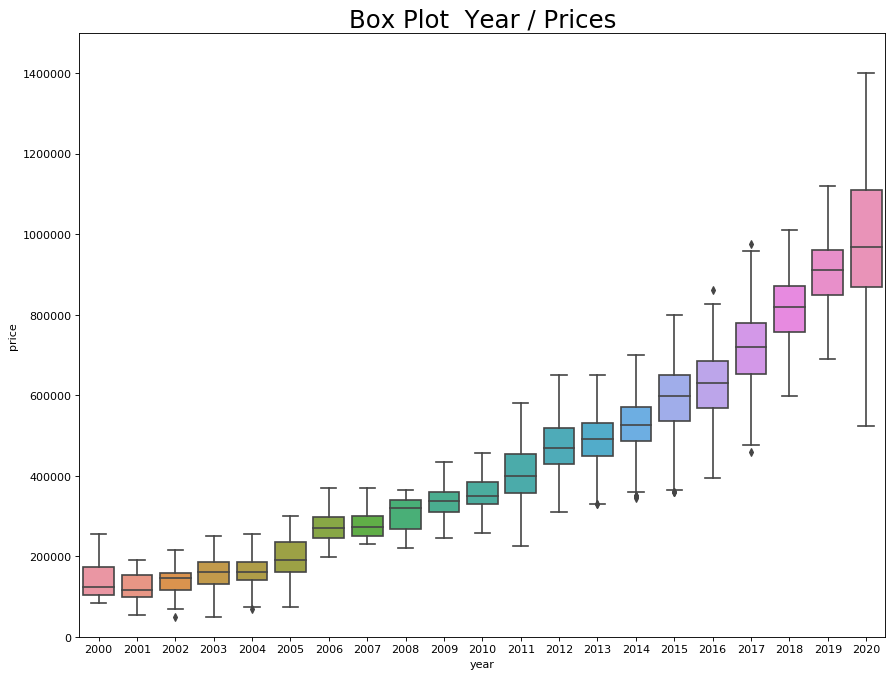

In [158]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [159]:
# еще раз удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

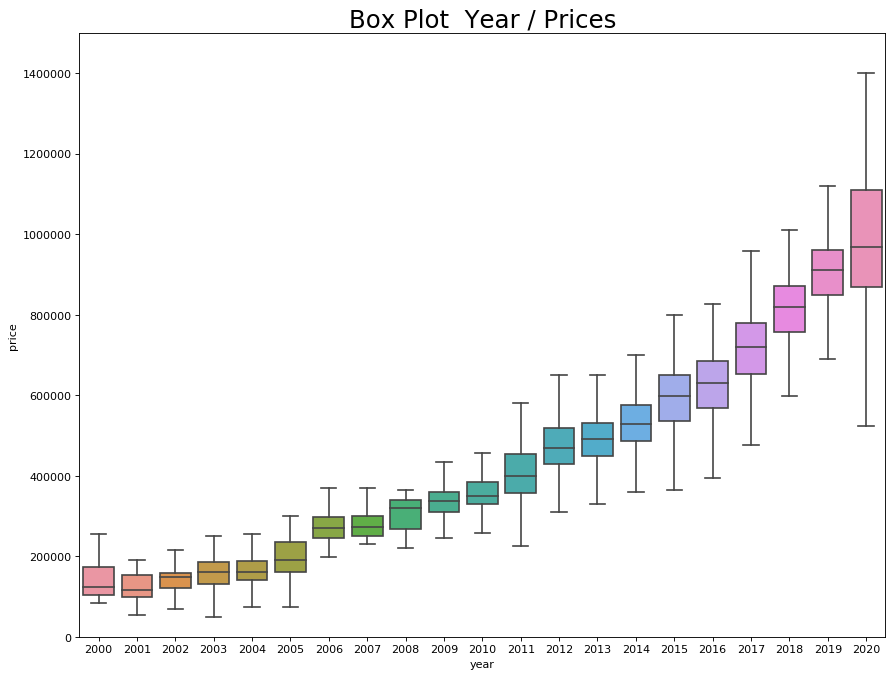

In [160]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [161]:
X = df.drop(['price'], axis=1)
y = df['price']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 188508.3879196	total: 4.93ms	remaining: 3.94s
1:	learn: 184226.6760991	total: 8.94ms	remaining: 3.56s
2:	learn: 180029.5547197	total: 11.7ms	remaining: 3.11s
3:	learn: 175949.4996621	total: 14.6ms	remaining: 2.9s
4:	learn: 171909.8530416	total: 19ms	remaining: 3.02s
5:	learn: 168050.6395215	total: 22.3ms	remaining: 2.96s
6:	learn: 164517.7018752	total: 26.3ms	remaining: 2.98s
7:	learn: 160966.6956758	total: 29.1ms	remaining: 2.88s
8:	learn: 157410.3855009	total: 32.7ms	remaining: 2.88s
9:	learn: 154092.7560079	total: 36.6ms	remaining: 2.89s
10:	learn: 150922.9824232	total: 40.8ms	remaining: 2.93s
11:	learn: 147697.6040209	total: 43.9ms	remaining: 2.88s
12:	learn: 144545.8924383	total: 47.2ms	remaining: 2.86s
13:	learn: 141579.8230134	total: 50.2ms	remaining: 2.82s
14:	learn: 138752.6579713	total: 54.3ms	remaining: 2.84s
15:	learn: 135903.3071845	total: 58.9ms	remaining: 2.89s
16:	learn: 133178.9463843	total: 62.2ms	remaining: 2.87s
17:	learn: 130501.5941277	total: 66ms	remain

184:	learn: 53638.3884002	total: 671ms	remaining: 2.23s
185:	learn: 53627.5683233	total: 674ms	remaining: 2.22s
186:	learn: 53613.6340133	total: 678ms	remaining: 2.22s
187:	learn: 53595.8232568	total: 681ms	remaining: 2.22s
188:	learn: 53580.5060173	total: 685ms	remaining: 2.21s
189:	learn: 53555.5583070	total: 688ms	remaining: 2.21s
190:	learn: 53531.8093849	total: 690ms	remaining: 2.2s
191:	learn: 53513.5196465	total: 697ms	remaining: 2.21s
192:	learn: 53502.3688048	total: 702ms	remaining: 2.21s
193:	learn: 53495.2771705	total: 707ms	remaining: 2.21s
194:	learn: 53477.8236243	total: 711ms	remaining: 2.21s
195:	learn: 53456.8190202	total: 713ms	remaining: 2.2s
196:	learn: 53430.3183287	total: 717ms	remaining: 2.19s
197:	learn: 53410.5997995	total: 721ms	remaining: 2.19s
198:	learn: 53400.6062648	total: 725ms	remaining: 2.19s
199:	learn: 53376.4288054	total: 729ms	remaining: 2.19s
200:	learn: 53367.0285519	total: 732ms	remaining: 2.18s
201:	learn: 53354.8069413	total: 734ms	remaining: 

341:	learn: 51905.9525112	total: 1.16s	remaining: 1.56s
342:	learn: 51894.6656801	total: 1.17s	remaining: 1.55s
343:	learn: 51880.4463543	total: 1.17s	remaining: 1.55s
344:	learn: 51869.2340348	total: 1.17s	remaining: 1.54s
345:	learn: 51865.8216146	total: 1.17s	remaining: 1.53s
346:	learn: 51853.3999371	total: 1.17s	remaining: 1.53s
347:	learn: 51845.7438702	total: 1.18s	remaining: 1.53s
348:	learn: 51842.2663365	total: 1.18s	remaining: 1.52s
349:	learn: 51838.7784542	total: 1.18s	remaining: 1.52s
350:	learn: 51824.3093346	total: 1.19s	remaining: 1.52s
351:	learn: 51819.7283599	total: 1.19s	remaining: 1.51s
352:	learn: 51810.0678043	total: 1.2s	remaining: 1.51s
353:	learn: 51803.7175446	total: 1.2s	remaining: 1.51s
354:	learn: 51796.5891213	total: 1.21s	remaining: 1.51s
355:	learn: 51794.4302412	total: 1.21s	remaining: 1.51s
356:	learn: 51790.0610500	total: 1.21s	remaining: 1.5s
357:	learn: 51785.5252485	total: 1.21s	remaining: 1.5s
358:	learn: 51782.3759982	total: 1.22s	remaining: 1.

500:	learn: 51084.4568737	total: 1.66s	remaining: 990ms
501:	learn: 51079.4426363	total: 1.66s	remaining: 987ms
502:	learn: 51077.6151962	total: 1.67s	remaining: 983ms
503:	learn: 51070.9343452	total: 1.67s	remaining: 980ms
504:	learn: 51066.5317261	total: 1.67s	remaining: 978ms
505:	learn: 51063.5555064	total: 1.68s	remaining: 975ms
506:	learn: 51058.4139810	total: 1.68s	remaining: 972ms
507:	learn: 51055.5565891	total: 1.68s	remaining: 968ms
508:	learn: 51052.3492101	total: 1.69s	remaining: 965ms
509:	learn: 51049.2902748	total: 1.69s	remaining: 961ms
510:	learn: 51044.6011700	total: 1.69s	remaining: 958ms
511:	learn: 51043.9746277	total: 1.7s	remaining: 954ms
512:	learn: 51042.7756011	total: 1.7s	remaining: 950ms
513:	learn: 51039.8859569	total: 1.7s	remaining: 947ms
514:	learn: 51033.6340479	total: 1.71s	remaining: 945ms
515:	learn: 51026.4390619	total: 1.71s	remaining: 942ms
516:	learn: 51015.0570125	total: 1.72s	remaining: 939ms
517:	learn: 51007.9286630	total: 1.72s	remaining: 9

680:	learn: 50412.4763386	total: 2.31s	remaining: 405ms
681:	learn: 50409.3243066	total: 2.32s	remaining: 402ms
682:	learn: 50404.5988099	total: 2.33s	remaining: 398ms
683:	learn: 50403.6412337	total: 2.33s	remaining: 395ms
684:	learn: 50399.5983170	total: 2.33s	remaining: 392ms
685:	learn: 50396.0161197	total: 2.35s	remaining: 390ms
686:	learn: 50388.3016032	total: 2.35s	remaining: 387ms
687:	learn: 50385.5919139	total: 2.36s	remaining: 384ms
688:	learn: 50382.4302525	total: 2.36s	remaining: 380ms
689:	learn: 50378.5546815	total: 2.36s	remaining: 377ms
690:	learn: 50376.5270073	total: 2.37s	remaining: 374ms
691:	learn: 50375.3147094	total: 2.37s	remaining: 370ms
692:	learn: 50370.7953497	total: 2.38s	remaining: 367ms
693:	learn: 50370.3582775	total: 2.38s	remaining: 364ms
694:	learn: 50365.9136543	total: 2.38s	remaining: 360ms
695:	learn: 50360.1700981	total: 2.39s	remaining: 357ms
696:	learn: 50354.9372706	total: 2.39s	remaining: 354ms
697:	learn: 50349.7787320	total: 2.4s	remaining:

In [163]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=4)

In [164]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 188508.3879196	total: 5.36ms	remaining: 4.29s
1:	learn: 184226.6760991	total: 10.1ms	remaining: 4.03s
2:	learn: 180029.5547197	total: 13.4ms	remaining: 3.57s
3:	learn: 175949.4996621	total: 17.3ms	remaining: 3.45s
4:	learn: 171909.8530416	total: 23.2ms	remaining: 3.69s
5:	learn: 168050.6395215	total: 27ms	remaining: 3.57s
6:	learn: 164517.7018752	total: 31.5ms	remaining: 3.57s
7:	learn: 160966.6956758	total: 35.4ms	remaining: 3.51s
8:	learn: 157410.3855009	total: 40ms	remaining: 3.51s
9:	learn: 154092.7560079	total: 61.2ms	remaining: 4.84s
10:	learn: 150922.9824232	total: 65.5ms	remaining: 4.7s
11:	learn: 147697.6040209	total: 82.1ms	remaining: 5.39s
12:	learn: 144545.8924383	total: 86.9ms	remaining: 5.26s
13:	learn: 141579.8230134	total: 90.6ms	remaining: 5.08s
14:	learn: 138752.6579713	total: 94.2ms	remaining: 4.93s
15:	learn: 135903.3071845	total: 101ms	remaining: 4.95s
16:	learn: 133178.9463843	total: 106ms	remaining: 4.87s
17:	learn: 130501.5941277	total: 110ms	remaining

158:	learn: 54229.0777553	total: 676ms	remaining: 2.72s
159:	learn: 54195.4567628	total: 678ms	remaining: 2.71s
160:	learn: 54170.6808732	total: 681ms	remaining: 2.7s
161:	learn: 54143.2515599	total: 683ms	remaining: 2.69s
162:	learn: 54123.0656663	total: 685ms	remaining: 2.68s
163:	learn: 54084.5383311	total: 689ms	remaining: 2.67s
164:	learn: 54056.2275747	total: 694ms	remaining: 2.67s
165:	learn: 54038.0595720	total: 697ms	remaining: 2.66s
166:	learn: 54016.2978880	total: 704ms	remaining: 2.67s
167:	learn: 53994.0225678	total: 712ms	remaining: 2.68s
168:	learn: 53969.4696235	total: 717ms	remaining: 2.68s
169:	learn: 53935.2131421	total: 720ms	remaining: 2.67s
170:	learn: 53915.5692419	total: 722ms	remaining: 2.65s
171:	learn: 53911.5319268	total: 725ms	remaining: 2.65s
172:	learn: 53889.2434098	total: 730ms	remaining: 2.65s
173:	learn: 53866.2497169	total: 732ms	remaining: 2.63s
174:	learn: 53832.5469488	total: 737ms	remaining: 2.63s
175:	learn: 53817.3061429	total: 741ms	remaining:

307:	learn: 52191.4772663	total: 1.17s	remaining: 1.87s
308:	learn: 52176.5588731	total: 1.17s	remaining: 1.86s
309:	learn: 52171.7069198	total: 1.17s	remaining: 1.86s
310:	learn: 52168.5905179	total: 1.18s	remaining: 1.85s
311:	learn: 52159.4925001	total: 1.18s	remaining: 1.84s
312:	learn: 52153.2960512	total: 1.18s	remaining: 1.84s
313:	learn: 52142.6551424	total: 1.19s	remaining: 1.84s
314:	learn: 52140.6080622	total: 1.19s	remaining: 1.83s
315:	learn: 52127.5691061	total: 1.19s	remaining: 1.83s
316:	learn: 52122.4555427	total: 1.2s	remaining: 1.83s
317:	learn: 52108.8894147	total: 1.2s	remaining: 1.82s
318:	learn: 52095.2981284	total: 1.2s	remaining: 1.82s
319:	learn: 52091.2299890	total: 1.21s	remaining: 1.81s
320:	learn: 52087.9500086	total: 1.21s	remaining: 1.81s
321:	learn: 52077.3952364	total: 1.21s	remaining: 1.8s
322:	learn: 52070.0520791	total: 1.22s	remaining: 1.8s
323:	learn: 52061.8460364	total: 1.23s	remaining: 1.8s
324:	learn: 52049.0300663	total: 1.23s	remaining: 1.79

493:	learn: 51119.3437889	total: 1.84s	remaining: 1.14s
494:	learn: 51115.2799129	total: 1.84s	remaining: 1.14s
495:	learn: 51112.1794677	total: 1.85s	remaining: 1.13s
496:	learn: 51104.1297567	total: 1.85s	remaining: 1.13s
497:	learn: 51100.8871354	total: 1.85s	remaining: 1.12s
498:	learn: 51095.4055721	total: 1.86s	remaining: 1.12s
499:	learn: 51091.4526320	total: 1.86s	remaining: 1.12s
500:	learn: 51084.4568737	total: 1.87s	remaining: 1.11s
501:	learn: 51079.4426363	total: 1.87s	remaining: 1.11s
502:	learn: 51077.6151962	total: 1.87s	remaining: 1.1s
503:	learn: 51070.9343452	total: 1.88s	remaining: 1.1s
504:	learn: 51066.5317261	total: 1.88s	remaining: 1.1s
505:	learn: 51063.5555064	total: 1.88s	remaining: 1.09s
506:	learn: 51058.4139810	total: 1.89s	remaining: 1.09s
507:	learn: 51055.5565891	total: 1.89s	remaining: 1.08s
508:	learn: 51052.3492101	total: 1.89s	remaining: 1.08s
509:	learn: 51049.2902748	total: 1.89s	remaining: 1.08s
510:	learn: 51044.6011700	total: 1.9s	remaining: 1.

646:	learn: 50537.1048178	total: 2.34s	remaining: 553ms
647:	learn: 50529.6742314	total: 2.34s	remaining: 550ms
648:	learn: 50524.5638187	total: 2.35s	remaining: 546ms
649:	learn: 50524.0184276	total: 2.35s	remaining: 542ms
650:	learn: 50522.5268584	total: 2.35s	remaining: 538ms
651:	learn: 50522.0882923	total: 2.35s	remaining: 533ms
652:	learn: 50513.9255989	total: 2.35s	remaining: 530ms
653:	learn: 50508.7815933	total: 2.36s	remaining: 526ms
654:	learn: 50505.7663453	total: 2.36s	remaining: 523ms
655:	learn: 50502.9926656	total: 2.37s	remaining: 519ms
656:	learn: 50500.6649596	total: 2.37s	remaining: 516ms
657:	learn: 50488.9015083	total: 2.37s	remaining: 512ms
658:	learn: 50484.9760479	total: 2.37s	remaining: 508ms
659:	learn: 50480.2950503	total: 2.38s	remaining: 504ms
660:	learn: 50479.1260313	total: 2.38s	remaining: 501ms
661:	learn: 50477.8526146	total: 2.38s	remaining: 497ms
662:	learn: 50472.4250493	total: 2.39s	remaining: 494ms
663:	learn: 50465.1318932	total: 2.39s	remaining

796:	learn: 50061.8180336	total: 2.84s	remaining: 10.7ms
797:	learn: 50060.5496451	total: 2.84s	remaining: 7.12ms
798:	learn: 50056.9701585	total: 2.85s	remaining: 3.56ms
799:	learn: 50056.0050804	total: 2.85s	remaining: 0us


In [165]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [166]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 53034.905160


###### Ошибка уменьшилась на 6261 руб (была 59296.882289), модель без выбросов точнее

### посмотрим для интереса стоимость моего автомобиля

In [167]:
# создадим фрейм с параметрами автомобиля

my_df = pd.DataFrame({'model': ['Kia Rio III Рестайлинг'], 'year': [2015], 'km_age': [68000],
                      'body_type': ['седан'], 'engine_power': [123],
                     'transmission': ['автоматическая'], 'owners_count': ['1 владелец']})

In [168]:
my_df

,model,year,km_age,body_type,engine_power,transmission,owners_count
0,Kia Rio III Рестайлинг,2015,68000,седан,123,автоматическая,1 владелец


In [169]:
# Получаем предсказание

my_preds = model.predict(my_df)

In [170]:
my_preds

array([676487.54957526])

### итак, мы получили цену 676487 рублей.
### для сравнения нашего предсказания обратимся к сайту robasta.ru, где за 99 рублей можно получить цену на авто

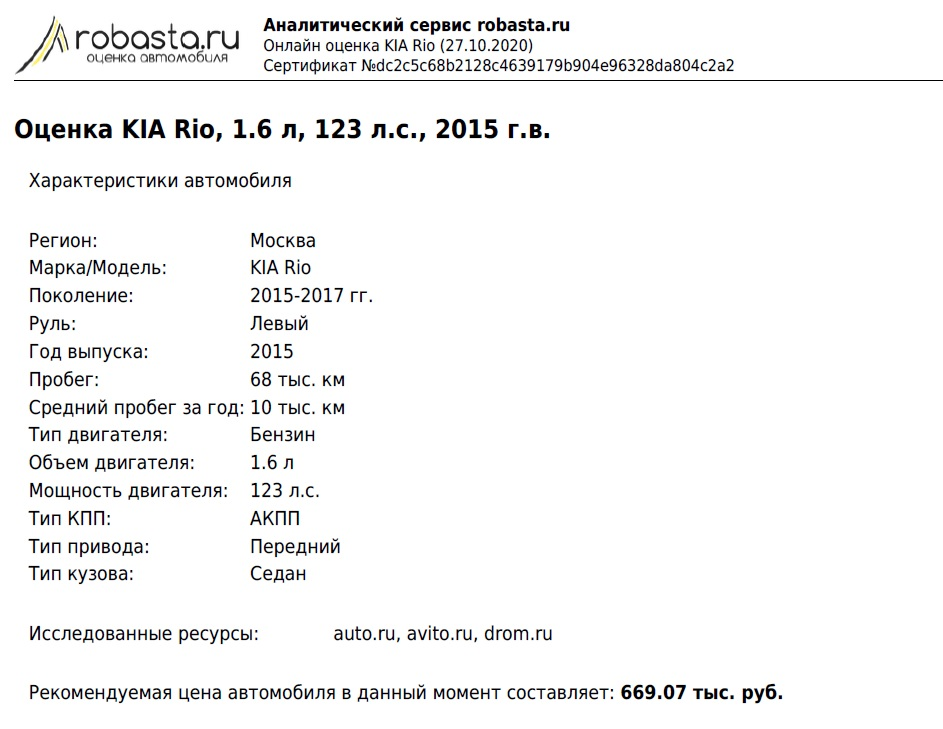

In [171]:
# Вот отчет с этого сайта

from IPython.display import Image
Image('C:\\Users\\user1174\\Downloads\\AutoRU_project\\robasta_kia.jpg')

### Мы получили отличный результат!